In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
import matplotlib.pyplot as plt

# 3. K-Means.

<h3> 3.1. Clustering Geográfico. </h3>

In [3]:
#Cargue de dataframe
df_sin_meteo = pd.read_excel("Datos/DF_SIN_Meteo.xlsx")

#Selección de variables a aplicar
coord = df_sin_meteo[['LATITUD','LONGITUD']].dropna().reset_index(drop=True)

#Creación de arreglo con valores de coordenadas
X = np.array(coord)

#Elbow Curve: Determinación de número de clústeres ideales.
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

In [4]:
#Selección de número de K-Clústeres
elbow_df = pd.DataFrame({'Clusters':Nc,'Score':score})

for i in range(len(elbow_df)):
    if elbow_df.loc[i,'Clusters'] == 1:
        elbow_df.loc[i,'Var'] = 0
        elbow_df.loc[i,'Var_Diff'] = 0
    else:
        elbow_df.loc[i,'Var'] = abs((abs(elbow_df.loc[i,'Score'] - elbow_df.loc[i-1,'Score']) / elbow_df.loc[i-1,'Score']) * 100)
        elbow_df.loc[i,'Var_Diff'] = abs(elbow_df.loc[i,'Var'] - elbow_df.loc[i-1,'Var'])

cont = -1
for i in elbow_df['Var']:
    cont += 1
    if i == 0:
        continue
    elif i < 10:
        n_cluster = cont
        score_cluster = i
        break

print("- N_Cluster Local: ",n_cluster+1,"\n- Var Cluster: ",score_cluster)

- N_Cluster Local:  11 
- Var Cluster:  9.977035817636422


In [5]:
elbow_df

,Clusters,Score,Var,Var_Diff
0,1,-1552.549925,0.000000,0.000000
1,2,-714.969221,53.948713,53.948713
2,3,-534.795954,25.200143,28.748570
3,4,-403.325043,24.583378,0.616765
4,5,-309.489596,23.265465,1.317913
5,6,-242.373782,21.685968,1.579497
6,7,-209.126797,13.717236,7.968731
7,8,-186.375629,10.879126,2.838110
8,9,-167.132391,10.324976,0.554151
9,10,-148.893956,10.912567,0.587592


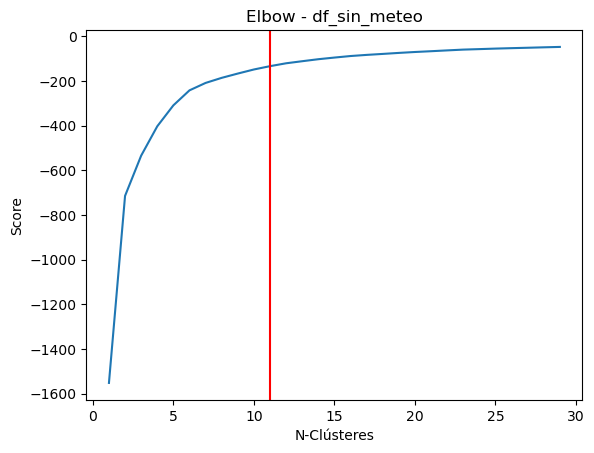

In [6]:
plt.plot(Nc,score)
plt.xlabel('N-Clústeres')
plt.ylabel('Score')
plt.title('Elbow - df_sin_meteo')
plt.axvline(x = n_cluster+1, color = 'red', label = 'axvline - full height')
plt.show()

In [7]:
#Aplicación K-Means
kmeans = KMeans(n_clusters = n_cluster+1).fit(X)
centroids = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(X)

In [8]:
df_sin_meteo = df_sin_meteo.dropna(subset=['LONGITUD','LATITUD']).reset_index(drop=True)
df_sin_meteo.shape

(325958, 17)

In [9]:
labels.shape

(325958,)

In [10]:
df_sin_meteo['Cluster'] = labels

<h3> 3.2. Clustering Multivariado. </h3>

In [11]:
#Cargue de dataframe
df_meteo = pd.read_excel("Datos/DF_Meteo.xlsx")

#Selección de variables a aplicar
base = df_meteo[['LATITUD','LONGITUD','RADIACION','EDAD']].dropna().reset_index(drop=True)

#Creación de arreglo con valores de coordenadas
X = np.array(base)

#Elbow Curve: Determinación de número de clústeres ideales.
Nc = range(1, 30)
kmeans2 = [KMeans(n_clusters=i) for i in Nc]
score2 = [kmeans2[i].fit(X).score(X) for i in range(len(kmeans2))]

In [12]:
#Selección de número de K-Clústeres
elbow_df2 = pd.DataFrame({'Clusters':Nc,'Score':score2})

for i in range(len(elbow_df2)):
    if elbow_df2.loc[i,'Clusters'] == 1:
        elbow_df2.loc[i,'Var'] = 0
        elbow_df2.loc[i,'Var_Diff'] = 0
    else:
        elbow_df2.loc[i,'Var'] = abs((abs(elbow_df2.loc[i,'Score'] - elbow_df2.loc[i-1,'Score']) / elbow_df2.loc[i-1,'Score']) * 100)
        elbow_df2.loc[i,'Var_Diff'] = abs(elbow_df2.loc[i,'Var'] - elbow_df2.loc[i-1,'Var'])

cont = -1
for i in elbow_df2['Var']:
    cont += 1
    if i == 0:
        continue
    elif i < 10:
        n_cluster2 = cont
        score_cluster2 = i
        break

print("- N_Cluster Local: ",n_cluster2 + 1,"\n- Var Cluster: ",score_cluster2)

- N_Cluster Local:  10 
- Var Cluster:  9.994561609244498


In [13]:
elbow_df2

,Clusters,Score,Var,Var_Diff
0,1,-3.812308e+08,0.000000,0.000000
1,2,-1.344630e+08,64.729233,64.729233
2,3,-8.242405e+07,38.701322,26.027911
3,4,-6.010167e+07,27.082371,11.618951
4,5,-4.960244e+07,17.469118,9.613253
5,6,-4.305429e+07,13.201255,4.267863
6,7,-3.808886e+07,11.532959,1.668297
7,8,-3.347480e+07,12.113930,0.580971
8,9,-3.011317e+07,10.042277,2.071653
9,10,-2.710349e+07,9.994562,0.047716


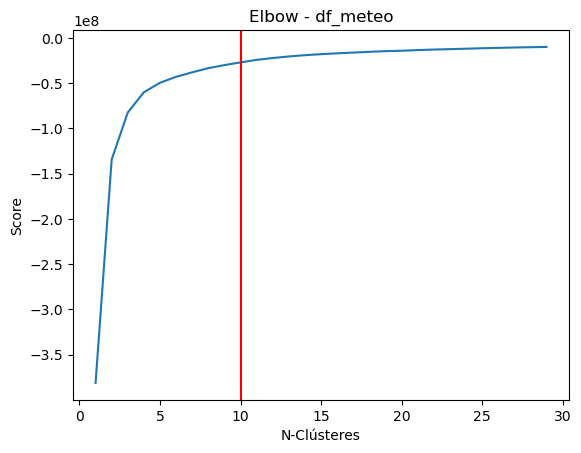

In [14]:
plt.plot(Nc,score2)
plt.xlabel('N-Clústeres')
plt.ylabel('Score')
plt.title('Elbow - df_meteo')
plt.axvline(x = n_cluster2+1, color = 'red', label = 'axvline - full height')
plt.show()

In [15]:
#Aplicación K-Means
kmeans2 = KMeans(n_clusters = n_cluster2+1).fit(X)
centroids2 = kmeans2.cluster_centers_

# Predicting the clusters
labels2 = kmeans2.predict(X)

In [16]:
df_meteo = df_meteo.dropna(subset=['LATITUD','LONGITUD','RADIACION','EDAD']).reset_index(drop=True)
df_meteo.shape

(144908, 19)

In [17]:
df_meteo['Cluster'] = labels2

<h3> 3.3. Resultados Clustering. </h3>

In [ ]:
#Extraer frecuencias por gravedad y cluster
dsm = df_sin_meteo[['Cluster','GRAVEDAD']]
dsm['Const'] = 1
dm = df_meteo[['Cluster','GRAVEDAD']]
dm['Const'] = 1

In [19]:
#dsm.groupby(by=['Cluster','GRAVEDAD']).sum()

In [20]:
#dm.groupby(by=['Cluster','GRAVEDAD']).sum()

In [21]:
df_sin_meteo.columns

Index(['ID', 'FECHA', 'HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR',
       'GRAVEDAD', 'TIPO PERSONA', 'ESTADO PERSONA', 'EDAD', 'SEXO',
       'LOCALIDAD', 'LATITUD', 'LONGITUD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA',
       'HORA_NOM', 'Cluster'],
      dtype='object')

In [22]:
df_sin_meteo_cluster = df_sin_meteo[['ID','HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR','GRAVEDAD', 'TIPO PERSONA', 'EDAD', 'SEXO',
       'PERSONAS IMPLICADAS', 'DIA_SEMANA' ,'Cluster', 'LATITUD', 'LONGITUD',]]
df_sin_meteo_cluster.to_csv('df_sin_meteo_cluster.csv',index=False,sep=',')

In [23]:
df_sin_m = df_sin_meteo[['HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR',
       'GRAVEDAD', 'TIPO PERSONA', 'EDAD', 'SEXO', 'LOCALIDAD', 'LATITUD', 'LONGITUD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA']]
df_sin_m.to_csv('df_sin_m.csv',index=False,sep=',')

#----------------------------

In [24]:
df_meteo.columns

Index(['ID', 'FECHA', 'HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR',
       'GRAVEDAD', 'TIPO PERSONA', 'ESTADO PERSONA', 'EDAD', 'SEXO',
       'LOCALIDAD', 'LATITUD', 'LONGITUD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA',
       'HORA_NOM', 'LLUVIA', 'RADIACION', 'Cluster'],
      dtype='object')

In [25]:
df_meteo_cluster = df_meteo[['ID','HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR',
       'GRAVEDAD', 'TIPO PERSONA', 'SEXO', 'PERSONAS IMPLICADAS', 'DIA_SEMANA', 'LLUVIA','RADIACION', 'Cluster', 'LATITUD', 'LONGITUD']]
df_meteo_cluster.to_csv('df_meteo_cluster.csv',index=False,sep=',')

In [26]:
df_m = df_meteo[['HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR', 'GRAVEDAD', 'TIPO PERSONA', 'EDAD', 'SEXO',
       'LOCALIDAD', 'LATITUD', 'LONGITUD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA', 'LLUVIA', 'RADIACION']]
df_m.to_csv('df_m.csv',index=False,sep=',')